# Importing pandas, numpy, pyplot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset

In [3]:
df = pd.read_csv('TheSocialDilemma.csv')

In [4]:
df.shape

(20068, 14)

In [5]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


In [6]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'Sentiment'],
      dtype='object')

## Categorized into negative, positive, neutral

In [7]:
df["Sentiment"].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [8]:
positive = df[(df.Sentiment == 'Positive')]
negative = df[(df.Sentiment == 'Negative')]
neutral = df[(df.Sentiment == 'Neutral')]


In [9]:
positive = positive['text']
negative = negative['text']
neutral = neutral['text']

In [10]:
positive_text = ""
for i in positive:
    positive_text += i + ' '

negative_text = ""
for i in negative:
    negative_text += i + ' '
    
neutral_text = ""
for i in neutral:
    neutral_text += i + ' '

## Cleaning text from unnecessary things

### Importing nltk for cleaning from stopwords

In [11]:
from nltk.corpus import stopwords

### View of our text

### Importing supporting modules for easier work with text

In [12]:
import re
import string

In [13]:
stop_words = stopwords.words("english")

### Removing mentions, url, hashtags, all numbers, punctuations, extra spaces and converting to lowercase

In [14]:
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text
positive_clean_text=clean_text(positive_text)
negative_clean_text=clean_text(negative_text)
neutral_clean_text=clean_text(neutral_text)

In [49]:
positive_clean_text[:999]

'go watch “the social dilemma” netflix it’s best minutes you’ll spend bet you💯… problem phone time trying watch 🤦🏼\u200d♀️ 😳 wow need regulations social media platforms quick documentary horror live okay i’m watching okey okey i’ve peer pressured watching ready made paranoid put documentary speaking social media addictive amp controlling ends bac… watch social dilemna really use social media it’s must finished watching looking take action support week action call… important allows owners able change activation wake… last generation aware different reality exists without influence social media… great documentary movie netflix far it’s ex employees large social media giants slating large social media giants amp time setting… one best insightful documentary social media must watch irony i’m tweeting not… everyone watch social dilemma netflix it’s probably late us maybe better for… can’t say i’m surprised things conscious i’m turned made think much want watch by… everyone must go watch net

## Importing nltk for tokenezation

### Tokenezating text

In [17]:
from nltk.tokenize import word_tokenize

In [19]:
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens
tokenization_positive_text = tokenization(positive_clean_text)
tokenization_negative_text = tokenization(negative_clean_text)
tokenization_neutral_text = tokenization(neutral_clean_text)

In [54]:
tokenization_positive_text[:30]

['go',
 'watch',
 '“',
 'the',
 'social',
 'dilemma',
 '”',
 'netflix',
 'it',
 '’',
 's',
 'best',
 'minutes',
 'you',
 '’',
 'll',
 'spend',
 'bet',
 'you💯…',
 'problem',
 'phone',
 'time',
 'trying',
 'watch',
 '🤦🏼\u200d♀️',
 '😳',
 'wow',
 'need',
 'regulations',
 'social']

## Importing lemmatizer and stemmer

In [21]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

### Lemmatizer

In [25]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
lemmatizer_positive_text = lemmatizer(tokenization_positive_text)
lemmatizer_negative_text = lemmatizer(tokenization_negative_text)
lemmatizer_neutral_text = lemmatizer(tokenization_neutral_text)

In [55]:
lemmatizer_positive_text[:30]

['go',
 'watch',
 '“',
 'the',
 'social',
 'dilemma',
 '”',
 'netflix',
 'it',
 '’',
 's',
 'best',
 'minute',
 'you',
 '’',
 'll',
 'spend',
 'bet',
 'you💯…',
 'problem',
 'phone',
 'time',
 'trying',
 'watch',
 '🤦🏼\u200d♀️',
 '😳',
 'wow',
 'need',
 'regulation',
 'social']

### Stemmer

In [31]:
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
stemmer_positive_text = stemming(tokenization_positive_text)
stemmer_negative_text = stemming(tokenization_negative_text)
stemmer_neutral_text = stemming(tokenization_neutral_text)

In [56]:
stemmer_positive_text[:30]

['go',
 'watch',
 '“',
 'the',
 'social',
 'dilemma',
 '”',
 'netflix',
 'it',
 '’',
 's',
 'best',
 'minut',
 'you',
 '’',
 'll',
 'spend',
 'bet',
 'you💯…',
 'problem',
 'phone',
 'time',
 'tri',
 'watch',
 '🤦🏼\u200d♀️',
 '😳',
 'wow',
 'need',
 'regul',
 'social']

## Importing wordcloud


In [33]:
from wordcloud import WordCloud

In [34]:
def visualize(text):
    wordcloud = WordCloud(width=600, height=400, background_color="black").generate(text)
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

## Making lemmatized wordcloud

### Positive_lemmatizer_wordcloud

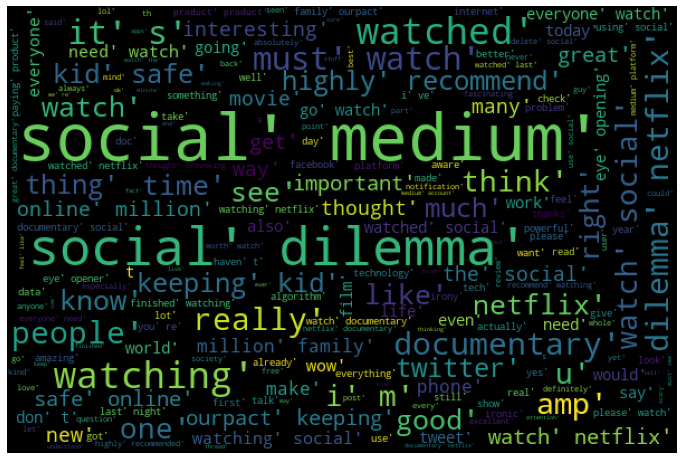

In [35]:
visualize(str(lemmatizer_positive_text))

### Negative_lemmatizer_wordcloud

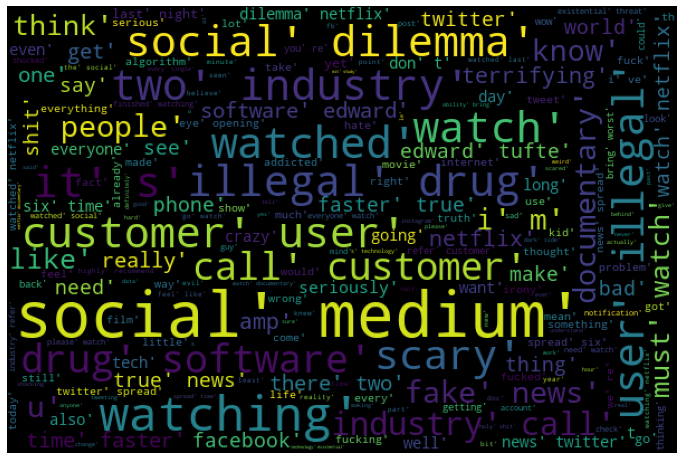

In [36]:
visualize(str(lemmatizer_negative_text))

### Neutral_lemmatizer_wordcloud

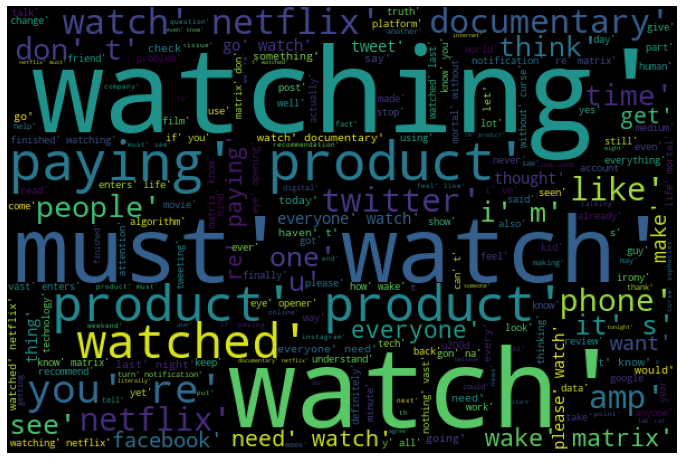

In [37]:
visualize(str(lemmatizer_neutral_text))

## Making stemmed wordcloud

### Positive_stemmer_wordcloud

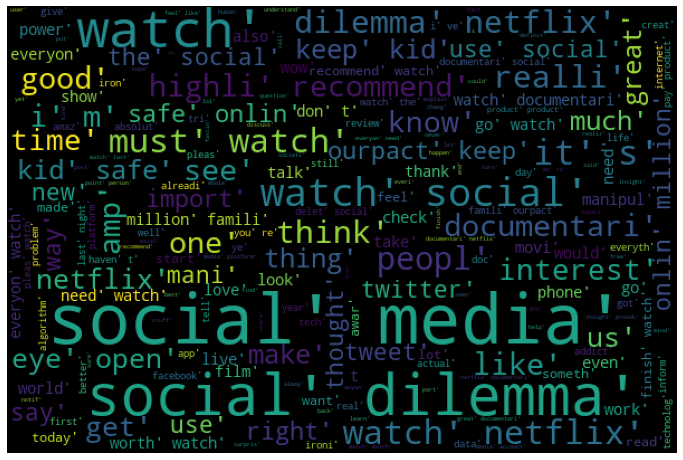

In [38]:
visualize(str(stemmer_positive_text))

### Negative_stemmer_wordcloud

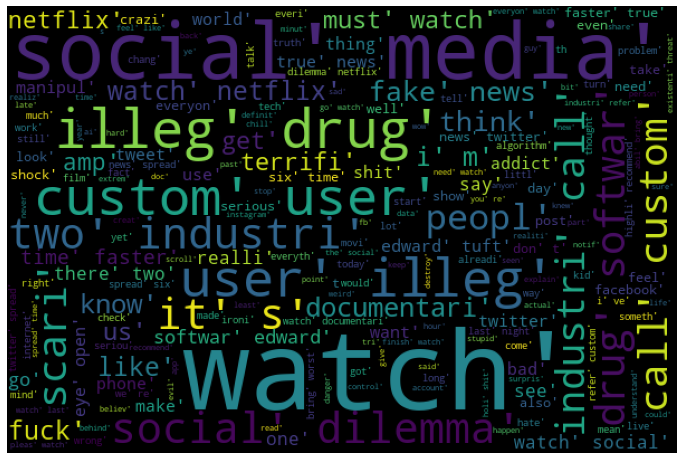

In [57]:
visualize(str(stemmer_negative_text))

### Neutral_stemmer_wordcloud

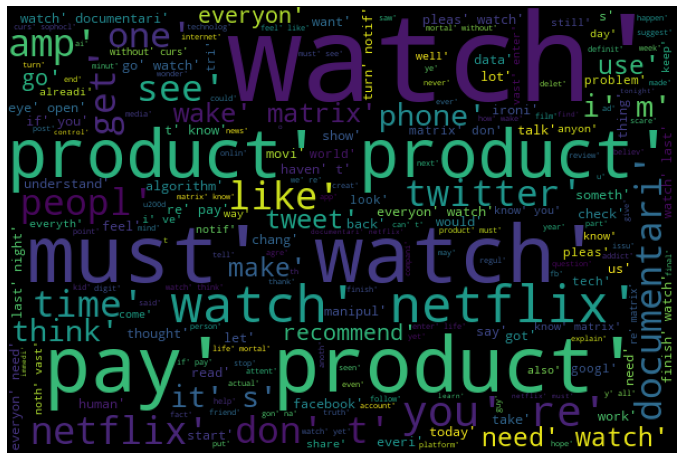

In [58]:
visualize(str(stemmer_neutral_text))